In [ ]:
import pandas as pd
import numpy as np
import joblib
from joblib import dump, load
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, make_scorer)
import tensorflow as tf
from tensorflow import keras
np.random.seed(1)
tf.random.set_seed(1)
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv("train_normalizado.csv", engine = "python", error_bad_lines=False)

In [ ]:
df_train.head(5)

,ID,review_es,sentimiento,sentimiento_1
0,0,críticos mencionado después ver solo 1 oz epis...,positivo,1
1,1,pequeña pequeña producción técnica filmación i...,positivo,1
2,2,pensé manera maravillosa pasar tiempo fin sema...,positivo,1
3,3,básicamente familia niño pequeño jake piensa z...,negativo,0
4,4,amor tiempo petter mattei película visualmente...,positivo,1


In [ ]:
datos_faltantes = df_train.isnull().sum()
print(datos_faltantes)

ID               0
review_es        0
sentimiento      0
sentimiento_1    0
dtype: int64


In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_pred,y_test))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:

#Creo un dataset con los features que voy a usar para clasificar
df_train_x = df_train['review_es']

#Creo un dataset con la variable target
df_train_y = df_train['sentimiento_1'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(df_train_x,
                                                    df_train_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    stratify=df_train_y.values) #semilla

Implementamos el modelo **Bag of Words**

Obtenemos un dataframe del vocabulario

In [ ]:
vector = CountVectorizer()

X = vector.fit_transform(df_train_x)

vocabulario_df = pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out())
vocabulario_df

,00,000,00000,00000001,00001,0001,001,003830,0069,007,...,útil,útiles,útilmente,über,übermenschlich,überwoman,ünfaful,üvegtigris,üzümcü,żmijewski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Y ahora obtenemos una lista de todo el vocabulario que se encuentra en las reseñas

In [ ]:
vocabulario = vector.get_feature_names_out()
print(vocabulario)

['00' '000' '00000' ... 'üvegtigris' 'üzümcü' 'żmijewski']


##RANDOM FOREST

In [ ]:
R_f = make_pipeline(TfidfVectorizer(), RandomForestClassifier()) #Tokenizamos el texto

In [ ]:
R_f.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
y_pred_R_M = R_f.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      3747
           1       0.79      0.85      0.82      3225

    accuracy                           0.83      6972
   macro avg       0.83      0.83      0.83      6972
weighted avg       0.83      0.83      0.83      6972



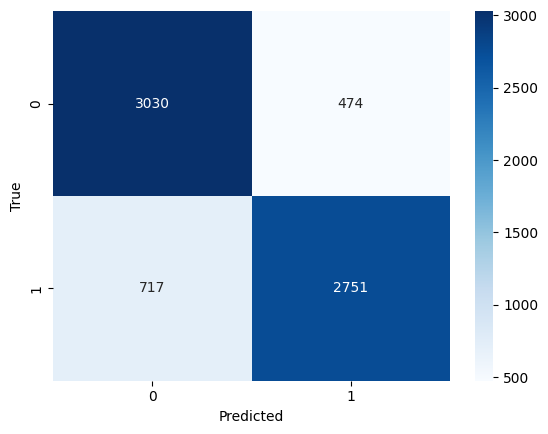

In [ ]:
metricas(y_pred_R_M,y_test)

## Importamos el Dataset del Test normalizado



In [ ]:
df_test  = pd.read_csv("test_normalizado.csv", engine="python")
df_copy_id_test = df_test['ID'] #copio el id y lo quito del dataframe
df_test.drop(['ID'], axis='columns', inplace=True)
df_test.head(5)

,review_es
0,mayor virtud película existencia hecho podamos...
1,experto cinéfilo pocas veces tan juego sala ci...
2,si incondicional humor estilo tele 5 si termin...
3,sé pasando si gente deja llevar modas si verda...
4,"amanece,y quedo solo,siento fondoun mar vacío,..."


##SUBMIT RANDOM FOREST

In [ ]:
y_submit_R_f = R_f.predict(df_test['review_es'])

In [ ]:
df_submit_test = pd.DataFrame({'ID': df_copy_id_test,'sentimiento':y_submit_R_f})
df_submit_test['sentimiento'] = np.where(df_submit_test['sentimiento'] == 1, 'positivo', 'negativo')

df_submit_test.to_csv('Submit_test.csv',index = False)